#Exploratory Data Analysis using Python
Let us perform Exploratory data analysis on a datase using python. The Dataset is, **Amazon's Top 50 Bestselling books from 2009-2019**


Thus dataset is obtained from https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#Importing the Data

In [186]:
data=pd.read_csv('/content/bestsellers with categories.csv')

#Understanding the Data

In [187]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [188]:
data.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [189]:
data.drop_duplicates(inplace=True, subset=['Name'])

In [190]:
data.shape

(351, 7)

In [222]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

##Let us now check for Unique and null values(if any).

In [192]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64

In [193]:
data['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [194]:
data['User Rating'].unique()

array([4.7, 4.6, 4.8, 4.4, 4.5, 3.9, 4.3, 4.2, 4.9, 3.8, 3.6, 4. , 4.1,
       3.3])

In [195]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

#Exploring relationships between the variables

In [196]:
correlation=data.corr()

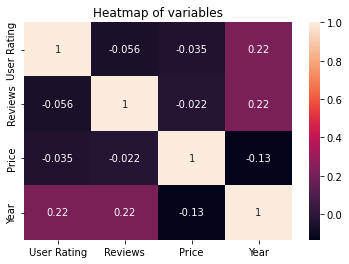

In [223]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)
plt.title('Heatmap of variables')
plt.show()

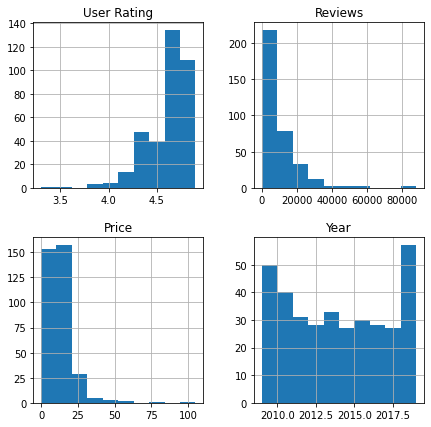

In [237]:
plt.rcParams['figure.figsize']=(7,7)
data.hist()
plt.show()

Pairwise Relationship between variables is as follows.

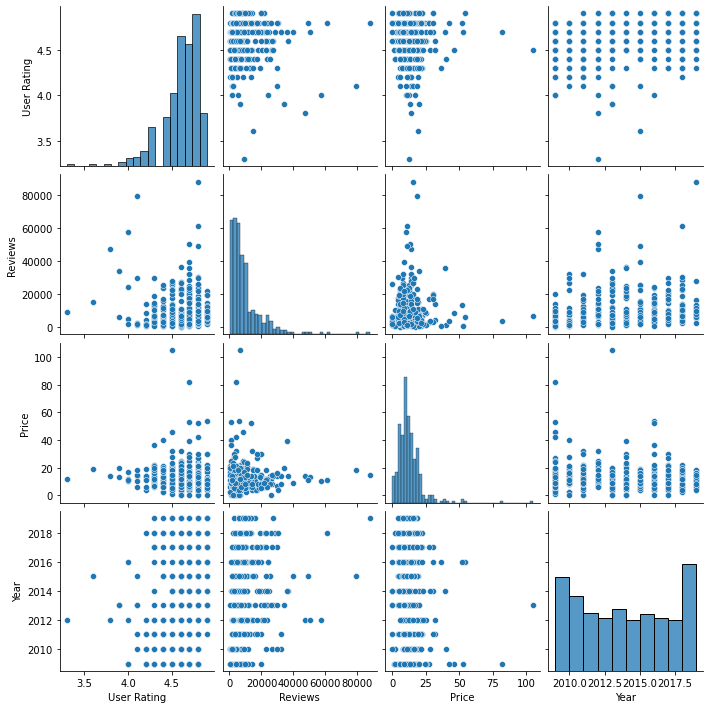

In [225]:
sns.pairplot(data)

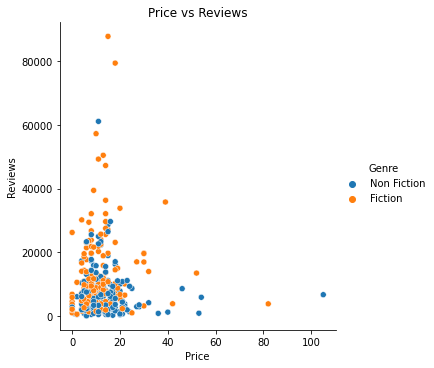

In [233]:
sns.relplot(x='Price',y='Reviews',hue='Genre',data=data)
plt.title('Price vs Reviews')
plt.show()

The above relational plot suggests that there are almost same number of reviews for the similar price range i.e., 0-25. 

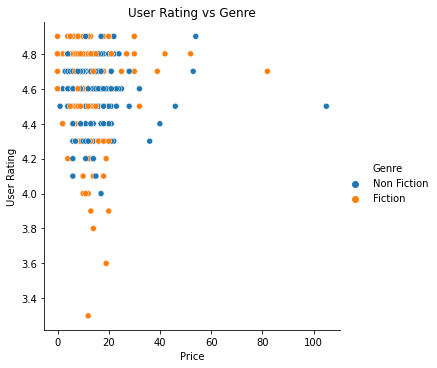

In [200]:
sns.relplot(x='Price',y='User Rating',hue='Genre',data=data)
plt.title('User Rating vs Genre')
plt.show()

Fiction genre books are the best rated when compared to non fiction genre books.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


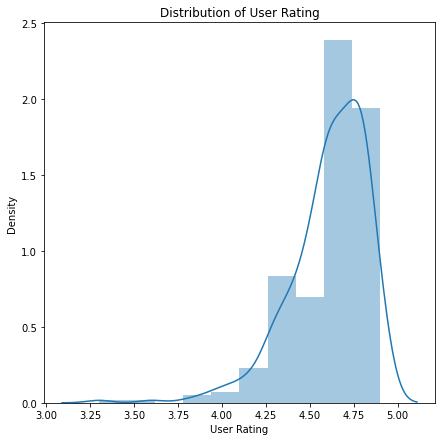

In [238]:
sns.distplot(data['User Rating'],bins=10)
plt.title('Distribution of User Rating')
plt.show()

From the above User distribution, we can conclude that many users provided the reviews ranging from 4.26 - 4.86

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


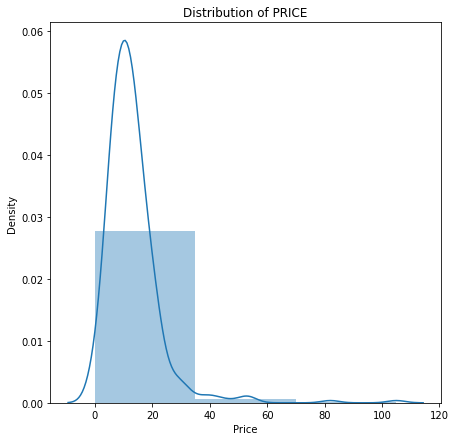

In [239]:
 sns.distplot(data['Price'],bins=3)
 plt.title('Distribution of PRICE')
 plt.show()

The price of many books is below $20 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


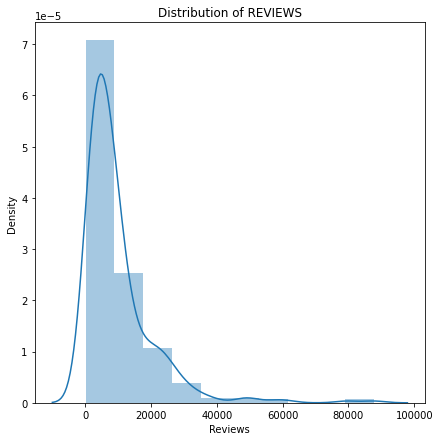

In [240]:
sns.distplot(data['Reviews'],bins=10)
plt.title('Distribution of REVIEWS')
plt.show()

The maximum no of reviews for any book are below 20000

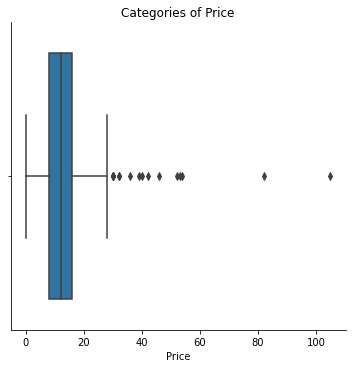

In [204]:
sns.catplot(x='Price',kind='box',data=data)
plt.title('Categories of Price')
plt.show()

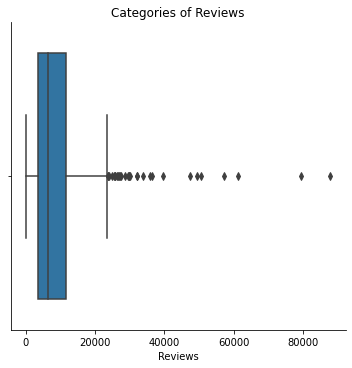

In [205]:
sns.catplot(x='Reviews',kind='box',data=data)
plt.title('Categories of Reviews')
plt.show()

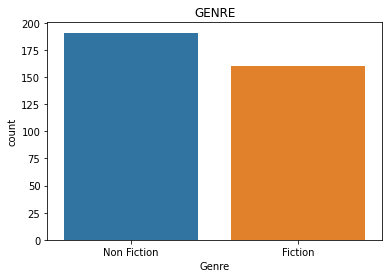

In [206]:
sns.countplot(x='Genre', data=data)
plt.title('GENRE')
plt.show()

Many people preferred Non Fiction genre than Fiction genre. 

In [207]:
costliest_books= data[['Name','Author','Genre','Price','Year']]
costliest_books= costliest_books.sort_values('Price', ascending=False)[:5]
costliest_books

,Name,Author,Genre,Price,Year
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105,2013
473,The Twilight Saga Collection,Stephenie Meyer,Fiction,82,2009
151,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54,2016
346,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53,2009
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52,2016


In [208]:
least_rated=data[['Name','Author','Genre','Price','Year','User Rating']]
least_rated=least_rated.sort_values('User Rating',ascending=True)[:6]
least_rated

,Name,Author,Genre,Price,Year,User Rating
353,The Casual Vacancy,J.K. Rowling,Fiction,12,2012,3.3
132,Go Set a Watchman: A Novel,Harper Lee,Fiction,19,2015,3.6
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,Fiction,14,2012,3.8
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,Fiction,20,2013,3.9
22,Allegiant,Veronica Roth,Fiction,13,2013,3.9
135,Gone Girl,Gillian Flynn,Fiction,10,2012,4.0


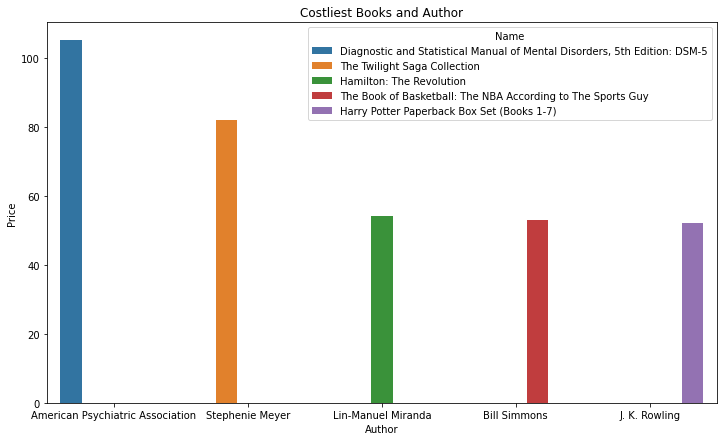

In [214]:
plt.figure(figsize=(12,7))
sns.barplot(x= 'Author', y='Price',hue='Name',data=costliest_books)
plt.title('Costliest Books and Author')
plt.show()

The above barplot gives the details of 5 most costly books and the  costliest book is **"Diagnostic and Statistical Manual of Mental disorders, 5th Edition: DSM-5"** by American Psychiatric Association.  

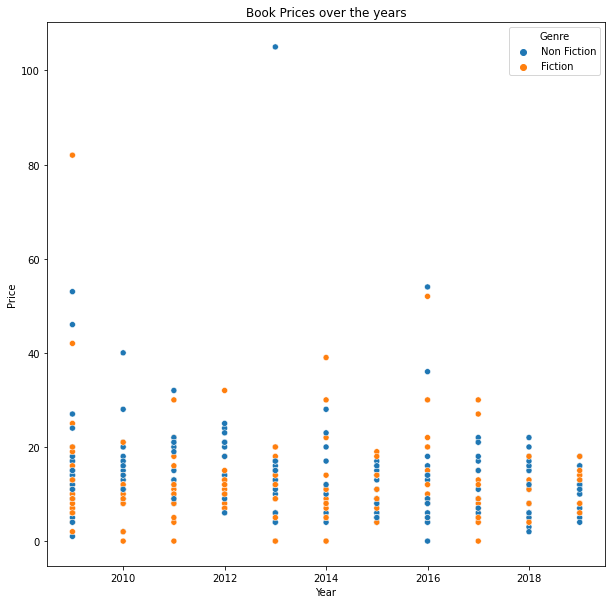

In [217]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=data['Year'], y=data['Price'], hue=data['Genre'])
plt.title("Book Prices over the years")
plt.show()

Irrsepective of the years change, most of the book prices remained constant

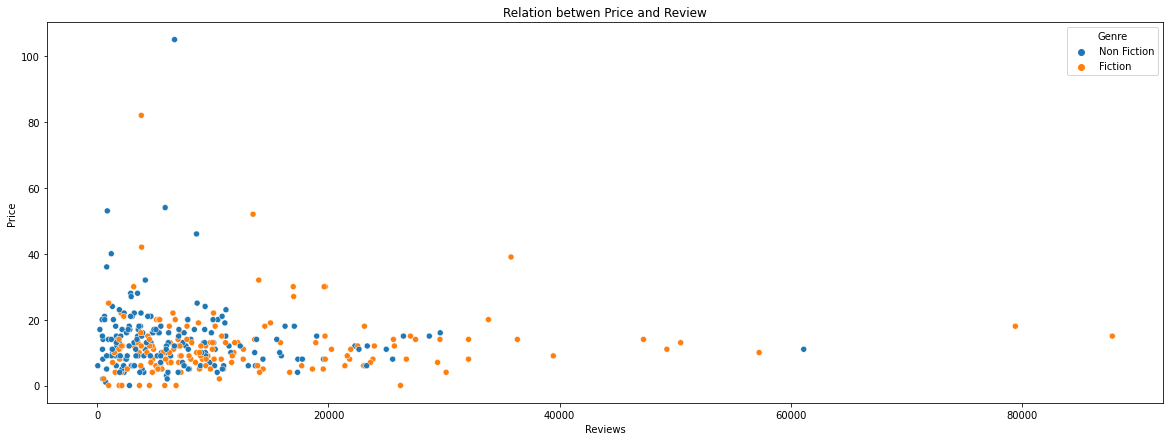

In [221]:
plt.figure(figsize=(20,7))
sns.scatterplot(x=data['Reviews'], y=data['Price'], hue=data['Genre'])
plt.title("Relation betwen Price and Review")
plt.show()

In some cases, fictional books have more reviews are lesser in price and higher price Non fiction books having less reviews. 